<a href="https://colab.research.google.com/github/udghosh/Employee_Attrition/blob/main/Employee_attrition_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ml data.csv to Ml data (4).csv


In [ ]:
#df = pd.read_csv('Ml data.csv',header=0)
df = pd.read_csv('Ml data (4).csv',names=['Stay/Left', 'Location', 'Emp. Group', 'Function', 'Gender', 'Tenure',	'Tenure Grp.',	'Experience (YY.MM)',	'Marital Status',	'Age in YY.',	'Hiring Source',	'Promoted/Non Promoted',	'Job Role Match',	'Commuting Problems',	'Tools provided for the job',	'Job Security',	'Company Benefits',	'Career Development'])
df.head(5)

,Stay/Left,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Commuting Problems,Tools provided for the job,Job Security,Company Benefits,Career Development
0,Left,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,5,7,5,4,9
1,Stay,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,8,3,4,6,7
2,Stay,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,7,8,7,4,6
3,Stay,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,4,6,7,9,5
4,Stay,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,4,6,5,5,4


In [ ]:
df.shape

(902, 18)

In [ ]:
df.dtypes

Stay/Left                      object
Location                       object
Emp. Group                     object
Function                       object
Gender                         object
Tenure                        float64
Tenure Grp.                    object
Experience (YY.MM)            float64
Marital Status                 object
Age in YY.                    float64
Hiring Source                  object
Promoted/Non Promoted          object
Job Role Match                 object
Commuting Problems              int64
Tools provided for the job      int64
Job Security                    int64
Company Benefits                int64
Career Development              int64
dtype: object

In [ ]:
df.isna().sum()


Stay/Left                     0
Location                      0
Emp. Group                    0
Function                      0
Gender                        0
Tenure                        0
Tenure Grp.                   0
Experience (YY.MM)            0
Marital Status                0
Age in YY.                    0
Hiring Source                 0
Promoted/Non Promoted         0
Job Role Match                0
Commuting Problems            0
Tools provided for the job    0
Job Security                  0
Company Benefits              0
Career Development            0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,Tenure,Experience (YY.MM),Age in YY.,Commuting Problems,Tools provided for the job,Job Security,Company Benefits,Career Development
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,1.198293,5.139956,29.055288,5.202882,5.830377,5.837029,5.835920,5.840355
std,0.823203,3.481367,4.499554,2.007166,1.911774,1.880752,1.758353,1.988594
min,0.000000,0.030000,21.050000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.110000,2.100000,26.050000,4.000000,5.000000,5.000000,5.000000,4.000000
50%,1.060000,4.110000,28.060000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,2.040000,7.020000,31.070000,7.000000,7.000000,7.000000,7.000000,7.000000
max,3.000000,25.080000,52.060000,10.000000,10.000000,10.000000,10.000000,9.000000


In [ ]:
df['Stay/Left'].value_counts()

Stay    596
Left    306
Name: Stay/Left, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


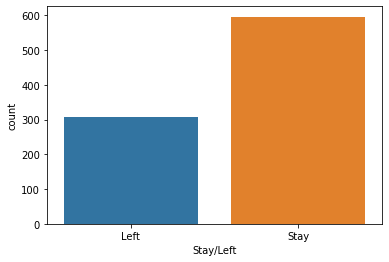

In [ ]:
sns.countplot(df['Stay/Left'])

In [ ]:
#percentage guess
(596 - 306)/596

0.4865771812080537

In [ ]:
df.corr()

,Tenure,Experience (YY.MM),Age in YY.,Commuting Problems,Tools provided for the job,Job Security,Company Benefits,Career Development
Tenure,1.000000,-0.040845,-0.071027,0.114193,0.017045,0.092539,0.022081,-0.064203
Experience (YY.MM),-0.040845,1.000000,0.835793,-0.029064,0.081727,0.057827,0.155328,0.096030
Age in YY.,-0.071027,0.835793,1.000000,-0.034647,0.047183,0.035765,0.153134,0.080344
Commuting Problems,0.114193,-0.029064,-0.034647,1.000000,0.047447,-0.046799,-0.002507,0.066239
Tools provided for the job,0.017045,0.081727,0.047183,0.047447,1.000000,0.143556,0.133353,0.147305
Job Security,0.092539,0.057827,0.035765,-0.046799,0.143556,1.000000,0.217772,0.128059
Company Benefits,0.022081,0.155328,0.153134,-0.002507,0.133353,0.217772,1.000000,0.180091
Career Development,-0.064203,0.096030,0.080344,0.066239,0.147305,0.128059,0.180091,1.000000


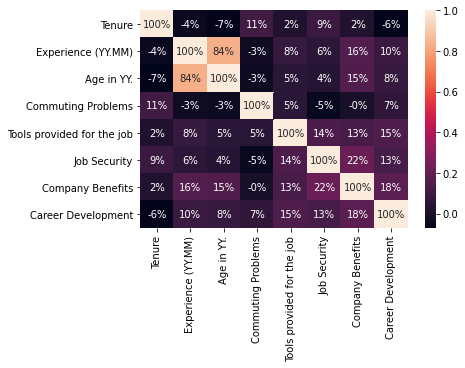

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
#transform non-numerical into numerical
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
      continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [ ]:
x = df.iloc[:, 1:df.shape[1]].values
y = df.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
forest.score(x_train, y_train)

0.9955621301775148

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(x_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Accuracy = {}'.format((TN+TP) / (TP+TN+FN+FP)))

[[ 60  18]
 [  9 139]]
Model Accuracy = 0.8805309734513275
